In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  mean_absolute_error


In [36]:
df1=pd.read_csv("D:/Desktop/Crawl/couple_booking_data.csv",index_col=None)


In [37]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
df1

,hotel_id,name,price,price_in_table,distance,type_room,room_size,hotel_star,sea_view,mountain_view,city_view,room_name,number_of_guests,private_bathroom,private_pool,rooftop_pool,minibar,barbecue,soundproofing,sauna,spa_bath,garden_view,number_of_bedrooms,url
0,1,Minh Phước Villa,"VND 7,695,000","VND 7,695,000",5.3 km from centre,Entire villa,400 m²,0,1.0,1.0,1.0,Villa with Sea View,14,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,6.0,https://www.booking.com/hotel/vn/minh-phuoc-villa.en-gb.html?label=gen173nr-1BCAEoggI46AdIM1gEaPQBiAEBmAEJuAEXyAEM2AEB6AEBiAIBqAIDuALfh_mzBsACAdICJGVhYTdkNjZiLTQ5NjEtNDRlMy05YTkwLTRlZDA2NDgxYjQ2Y9gCBeACAQ&sid=20394c3452926236aad651478adb440c&aid=304142&ucfs=1&arphpl=1&checkin=2024-08-14&checkout=2024-08-15&dest_id=-3733750&dest_type=city&group_adults=5&req_adults=5&no_rooms=2&group_children=0&req_children=0&hpos=1&hapos=1&sr_order=popularity&nflt=ht_id%3D213&srpvid=9a3a36b405230c95&srepoch=1720165941&all_sr_blocks=383675201_375813134_14_0_0&highlighted_blocks=383675201_375813134_14_0_0&matching_block_id=383675201_375813134_14_0_0&sr_pri_blocks=383675201_375813134_14_0_0__769500000&from=searchresults
1,2,Minh Phước Villa 12 Kim Ngân,"VND 10,350,000","VND 10,350,000",1.3 km from centre,Entire villa,450 m²,0,1.0,0.0,1.0,Villa,14,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,8.0,https://www.booking.com/hotel/vn/minh-phuoc-villa-12-kim-ngan.en-gb.html?label=gen173nr-1BCAEoggI46AdIM1gEaPQBiAEBmAEJuAEXyAEM2AEB6AEBiAIBqAIDuALfh_mzBsACAdICJGVhYTdkNjZiLTQ5NjEtNDRlMy05YTkwLTRlZDA2NDgxYjQ2Y9gCBeACAQ&sid=20394c3452926236aad651478adb440c&aid=304142&ucfs=1&arphpl=1&checkin=2024-08-14&checkout=2024-08-15&dest_id=-3733750&dest_type=city&group_adults=5&req_adults=5&no_rooms=2&group_children=0&req_children=0&hpos=2&hapos=2&sr_order=popularity&nflt=ht_id%3D213&srpvid=9a3a36b405230c95&srepoch=1720165941&all_sr_blocks=933697301_372568216_14_0_0&highlighted_blocks=933697301_372568216_14_0_0&matching_block_id=933697301_372568216_14_0_0&sr_pri_blocks=933697301_372568216_14_0_0__1035000000&from=searchresults
2,3,Đặng Diễm My Homestay 30/8,"VND 2,500,000","VND 2,500,000",1.8 km from centre,Entire villa,500 m²,0,0.0,0.0,0.0,Villa,15,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,https://www.booking.com/hotel/vn/dang-diem-my-homestay-30-8.en-gb.html?label=gen173nr-1BCAEoggI46AdIM1gEaPQBiAEBmAEJuAEXyAEM2AEB6AEBiAIBqAIDuALfh_mzBsACAdICJGVhYTdkNjZiLTQ5NjEtNDRlMy05YTkwLTRlZDA2NDgxYjQ2Y9gCBeACAQ&sid=20394c3452926236aad651478adb440c&aid=304142&ucfs=1&arphpl=1&checkin=2024-08-14&checkout=2024-08-15&dest_id=-3733750&dest_type=city&group_adults=5&req_adults=5&no_rooms=2&group_children=0&req_children=0&hpos=3&hapos=3&sr_order=popularity&nflt=ht_id%3D213&srpvid=9a3a36b405230c95&srepoch=1720165941&all_sr_blocks=1015411601_387896303_15_0_0&highlighted_blocks=1015411601_387896303_15_0_0&matching_block_id=1015411601_387896303_15_0_0&sr_pri_blocks=1015411601_387896303_15_0_0__250000000&from=searchresults
3,4,"T-Maison Boutique Villa, with Pool, Karaoke, Billiards, near beach, Vung Tau","VND 6,381,760","VND 6,381,760",5.5 km from centre,Entire villa,450 m²,0,0.0,0.0,0.0,Villa with Private Pool,15,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,https://www.booking.com/hotel/vn/t-maison-villa-mediterranean-style-near-beach.en-gb.html?label=gen173nr-1BCAEoggI46AdIM1gEaPQBiAEBmAEJuAEXyAEM2AEB6AEBiAIBqAIDuALfh_mzBsACAdICJGVhYTdkNjZiLTQ5NjEtNDRlMy05YTkwLTRlZDA2NDgxYjQ2Y9gCBeACAQ&sid=20394c3452926236aad651478adb440c&aid=304142&ucfs=1&arphpl=1&checkin=2024-08-14&checkout=2024-08-15&dest_id=-3733750&dest_type=city&group_adults=5&req_adults=5&no_rooms=2&group_children=0&req_children=0&hpos=4&hapos=4&sr_order=popularity&nflt=ht_id%3D213&srpvid=9a3a36b405230c95&srepoch=1720165941&all_sr_blocks=910168601_394061699_15_0_0&highlighted_blocks=910168601_394061699_15_0_0&matching_block_id=910168601_394061699_15_0_0&sr_pri_blocks=910168601_394061699_15_0_0__638176000&from_sustainable_property_sr=1&from=searchresults
4,5,Villa HOÀNG ĐỨC bãi sau free BIDA,"VND 3,992,240","VND 3,992,240",1.3 km fr

In [38]:
df1['price']=df1['price'].apply(lambda x:x.split(' ')[1])
df1['room_size'] = df1['room_size'].astype(str).apply(lambda x: x.split(' ')[0])
df1['price_in_table']=df1['price_in_table'].apply(lambda x:x.split(' ')[1])
df1['distance']=df1['distance'].apply(lambda x:x.split(' ')[0])
df1["price_in_table"]=df1["price_in_table"].str.replace(',', '').astype(float)


In [39]:
df1.drop(columns=["price","type_room","hotel_id","hotel_star"],inplace=True)

In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                517 non-null    object 
 1   price_in_table      517 non-null    float64
 2   distance            517 non-null    object 
 3   room_size           517 non-null    object 
 4   sea_view            513 non-null    float64
 5   mountain_view       513 non-null    float64
 6   city_view           513 non-null    float64
 7   room_name           513 non-null    object 
 8   number_of_guests    517 non-null    int64  
 9   private_bathroom    513 non-null    float64
 10  private_pool        513 non-null    float64
 11  rooftop_pool        513 non-null    float64
 12  minibar             513 non-null    float64
 13  barbecue            513 non-null    float64
 14  soundproofing       513 non-null    float64
 15  sauna               513 non-null    float64
 16  spa_bath

In [41]:
df1["room_size"]=df1["room_size"].astype(float)
df1["distance"]=df1["distance"].astype(float)

In [42]:
df1[df1["sea_view"].isnull() & df1["mountain_view"].isnull() & df1["city_view"].isnull()]

,name,price_in_table,distance,room_size,sea_view,mountain_view,city_view,room_name,number_of_guests,private_bathroom,private_pool,rooftop_pool,minibar,barbecue,soundproofing,sauna,spa_bath,garden_view,number_of_bedrooms,url
455,Villa Vũng Tàu - Biệt Thự Vũng Tàu Gần Biển Gần Trung Tâm,8259000.0,2.3,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.booking.com/hotel/vn/villa-vung-tau-biet-thu-vung-tau-gan-bien-gan-trung-tam.en-gb.html?label=gen173nr-1BCAEoggI46AdIM1gEaPQBiAEBmAEJuAEXyAEM2AEB6AEBiAIBqAIDuALfh_mzBsACAdICJGVhYTdkNjZiLTQ5NjEtNDRlMy05YTkwLTRlZDA2NDgxYjQ2Y9gCBeACAQ&sid=20394c3452926236aad651478adb440c&aid=304142&ucfs=1&arphpl=1&checkin=2024-08-14&checkout=2024-08-15&dest_id=-3733750&dest_type=city&group_adults=5&req_adults=5&no_rooms=2&group_children=0&req_children=0&hpos=17&hapos=456&sr_order=popularity&nflt=ht_id%3D213&srpvid=9a3a36b405230c95&srepoch=1720165889&all_sr_blocks=1204145402_392666056_8_0_0&highlighted_blocks=1204145402_392666056_8_0_0&matching_block_id=1204145402_392666056_8_0_0&sr_pri_blocks=1204145402_392666056_8_0_0__825900000&from=searchresults
513,The Cap Hotel,4473322.0,1.6,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.booking.com/hotel/vn/the-cap.en-gb.html?label=gen173nr-1BCAEoggI46AdIM1gEaPQBiAEBmAEJuAEXyAEM2AEB6AEBiAIBqAIDuALfh_mzBsACAdICJGVhYTdkNjZiLTQ5NjEtNDRlMy05YTkwLTRlZDA2NDgxYjQ2Y9gCBeACAQ&sid=20394c3452926236aad651478adb440c&aid=304142&ucfs=1&arphpl=1&checkin=2024-08-14&checkout=2024-08-15&dest_id=-3733750&dest_type=city&group_adults=5&req_adults=5&no_rooms=2&group_children=0&req_children=0&hpos=6&hapos=514&sr_order=popularity&nflt=ht_id%3D213&srpvid=9a3a36b405230c95&srepoch=1720165941&all_sr_blocks=657389710_373157590_14_1_0&highlighted_blocks=657389710_373157590_14_1_0&matching_block_id=657389710_373157590_14_1_0&sr_pri_blocks=657389710_373157590_14_1_0__1664964000&from_sustainable_property_sr=1&from=searchresults
514,Lur Home Premium Pool,4500000.0,5.0,NaN,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.booking.com/hotel/vn/lur-home-premium-pool.en-gb.html?label=gen173nr-1BCAEoggI46AdIM1gEaPQBiAEBmAEJuAEXyAEM2AEB6AEBiAIBqAIDuALfh_mzBsACAdICJGVhYTdkNjZiLTQ5NjEtNDRlMy05YTkwLTRlZDA2NDgxYjQ2Y9gCBeACAQ&sid=20394c3452926236aad651478adb440c&aid=304142&ucfs=1&arphpl=1&checkin=2024-08-14&checkout=2024-08-15&dest_id=-3733750&dest_type=city&group_adults=5&req_adults=5&no_rooms=2&group_children=0&req_children=0&hpos=7&hapos=515&sr_order=popularity&nflt=ht_id%3D213&srpvid=9a3a36b405230c95&srepoch=1720165941&all_sr_blocks=1170398903_389600208_16_2_0&highlighted_blocks=1170398903_389600208_16_2_0&matching_block_id=1170398903_389600208_16_2_0&sr_pri_blocks=1170398903_389600208_16_2_0__450000000&from=searchresults
515,The Latio Villa Pool,4900000.0,5.0,NaN,NaN,NaN,NaN,NaN,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.booking.com/hotel/vn/the-latio-villa-pool.en-gb.html?label=gen173nr-1BCAEoggI46AdIM1gEaPQBiAEBmAEJuAEXyAEM2AEB6AEBiAIBqAIDuALfh_mzBsACAdICJGVhYTdkNjZiLTQ5NjEtNDRlMy05YTkwLTRlZDA2NDgxYjQ2Y9gCBeACAQ&sid=20394c3452926236aad651478adb440c&aid=304142&ucfs=1&arphpl=1&checkin=2024-08-14&checkout=2024-08-15&dest_id=-3733750&dest_type=city&group_adults=5&req_adults=5&no_rooms=2&group_children=0&req_children=0&hpos=8&hapos=516&sr_order=popularity&nflt=ht_id%3D213&srpvid=9a3a36b405230c95&srepoch=1720165941&all_sr_blocks=1132858304_385950857_23_2_0&highlighted_blocks=1132858304_385950857_23_2_0&matching_block_id=1132858304_385950857_23_2_0&sr_pri_blocks=1132858304_385950857_23_2_0__490000000&from=searchresults


In [43]:
df1.loc[df1['hotel_id'] == 456, ['room_size', 'sea_view', 'mountain_view', 'city_view',
       'room_name', 'private_bathroom', 'private_pool',
       'rooftop_pool', 'minibar', 'barbecue', 'soundproofing', 'sauna',
       'spa_bath', 'garden_view', 'number_of_bedrooms']] = [200,0,0,1,'Three-Bedroom Villa',1,1,0,1,1,1,0,0,0,3]

KeyError: 'hotel_id'

In [44]:
df1[df1["room_size"].isnull()]

,name,price_in_table,distance,room_size,sea_view,mountain_view,city_view,room_name,number_of_guests,private_bathroom,private_pool,rooftop_pool,minibar,barbecue,soundproofing,sauna,spa_bath,garden_view,number_of_bedrooms,url
124,Biệt thự SONG LẬP Có Hồ Bơi,5952000.0,1.1,NaN,0.0,0.0,0.0,Villa,30,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,8.0,https://www.booking.com/hotel/vn/biet-thu-song-lap-co-ho-boi.en-gb.html?label=gen173nr-1BCAEoggI46AdIM1gEaPQBiAEBmAEJuAEXyAEM2AEB6AEBiAIBqAIDuALfh_mzBsACAdICJGVhYTdkNjZiLTQ5NjEtNDRlMy05YTkwLTRlZDA2NDgxYjQ2Y9gCBeACAQ&sid=20394c3452926236aad651478adb440c&aid=304142&ucfs=1&arphpl=1&checkin=2024-08-14&checkout=2024-08-15&dest_id=-3733750&dest_type=city&group_adults=5&req_adults=5&no_rooms=2&group_children=0&req_children=0&hpos=8&hapos=125&sr_order=popularity&nflt=ht_id%3D213&srpvid=9a3a36b405230c95&srepoch=1720165661&all_sr_blocks=1233451501_395308438_30_0_0&highlighted_blocks=1233451501_395308438_30_0_0&matching_block_id=1233451501_395308438_30_0_0&sr_pri_blocks=1233451501_395308438_30_0_0__595200000&from_sustainable_property_sr=1&from=searchresults
199,Money Villa Vũng Tàu,3150000.0,1.1,NaN,0.0,1.0,1.0,Villa with Private Pool,15,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,https://www.booking.com/hotel/vn/28-10c-luong-van-can-p2-tpvt.en-gb.html?label=gen173nr-1BCAEoggI46AdIM1gEaPQBiAEBmAEJuAEXyAEM2AEB6AEBiAIBqAIDuALfh_mzBsACAdICJGVhYTdkNjZiLTQ5NjEtNDRlMy05YTkwLTRlZDA2NDgxYjQ2Y9gCBeACAQ&sid=20394c3452926236aad651478adb440c&aid=304142&ucfs=1&arphpl=1&checkin=2024-08-14&checkout=2024-08-15&dest_id=-3733750&dest_type=city&group_adults=5&req_adults=5&no_rooms=2&group_children=0&req_children=0&hpos=14&hapos=200&sr_order=popularity&nflt=ht_id%3D213&srpvid=9a3a36b405230c95&srepoch=1720165708&all_sr_blocks=1124026501_385126986_15_0_0&highlighted_blocks=1124026501_385126986_15_0_0&matching_block_id=1124026501_385126986_15_0_0&sr_pri_blocks=1124026501_385126986_15_0_0__315000000&from=searchresults
205,DINH THỰ SIÊU VIP đi Bộ ra BIỂN Resort THỦY TIÊN,9600000.0,5.2,NaN,0.0,0.0,0.0,Villa,35,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,14.0,https://www.booking.com/hotel/vn/dinh-thu-sieu-vip-di-bo-ra-bien-resort-thuy-tien.en-gb.html?label=gen173nr-1BCAEoggI46AdIM1gEaPQBiAEBmAEJuAEXyAEM2AEB6AEBiAIBqAIDuALfh_mzBsACAdICJGVhYTdkNjZiLTQ5NjEtNDRlMy05YTkwLTRlZDA2NDgxYjQ2Y9gCBeACAQ&sid=20394c3452926236aad651478adb440c&aid=304142&ucfs=1&arphpl=1&checkin=2024-08-14&checkout=2024-08-15&dest_id=-3733750&dest_type=city&group_adults=5&req_adults=5&no_rooms=2&group_children=0&req_children=0&hpos=20&hapos=206&sr_order=popularity&nflt=ht_id%3D213&srpvid=9a3a36b405230c95&srepoch=1720165708&all_sr_blocks=1239640901_395903826_35_0_0&highlighted_blocks=1239640901_395903826_35_0_0&matching_block_id=1239640901_395903826_35_0_0&sr_pri_blocks=1239640901_395903826_35_0_0__960000000&from=searchresults
208,Sea Villa,6750000.0,1.6,NaN,0.0,0.0,0.0,Deluxe Villa,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,https://www.booking.com/hotel/vn/victory-villa-4.en-gb.html?label=gen173nr-1BCAEoggI46AdIM1gEaPQBiAEBmAEJuAEXyAEM2AEB6AEBiAIBqAIDuALfh_mzBsACAdICJGVhYTdkNjZiLTQ5NjEtNDRlMy05YTkwLTRlZDA2NDgxYjQ2Y9gCBeACAQ&sid=20394c3452926236aad651478adb440c&aid=304142&ucfs=1&arphpl=1&checkin=2024-08-14&checkout=2024-08-15&dest_id=-3733750&dest_type=city&group_adults=5&req_adults=5&no_rooms=2&group_children=0&req_children=0&hpos=23&hapos=209&sr_order=popularity&nflt=ht_id%3D213&srpvid=9a3a36b405230c95&srepoch=1720165708&all_sr_blocks=446642901_380002084_15_0_0&highlighted_blocks=446642901_380002084_15_0_0&matching_block_id=446642901_380002084_15_0_0&sr_pri_blocks=446642901_380002084_15_0_0__675000000&from=searchresults
238,Nancy Tran Grand Strip Vung Tau Villa 7,5950283.0,3.1,NaN,0.0,0.0,0.0,Villa,33,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,https://www.booking.com/hotel/vn/nancy-tran-grand-strip-vung-tau-villa-7-vung-tau.en-gb.html?label=gen173nr-1BCAEoggI46AdIM1gEaPQBiAEBmAEJuAEXyAEM2AEB6AEBiAIBqAIDuALfh_mzBsACAdICJGVhYTdkNjZiLTQ5NjEtNDRlMy05YTkwLTRlZDA2NDgxYjQ2Y9gCBeACAQ&sid=20

In [45]:
df1=df1[df1["room_size"].notnull()]

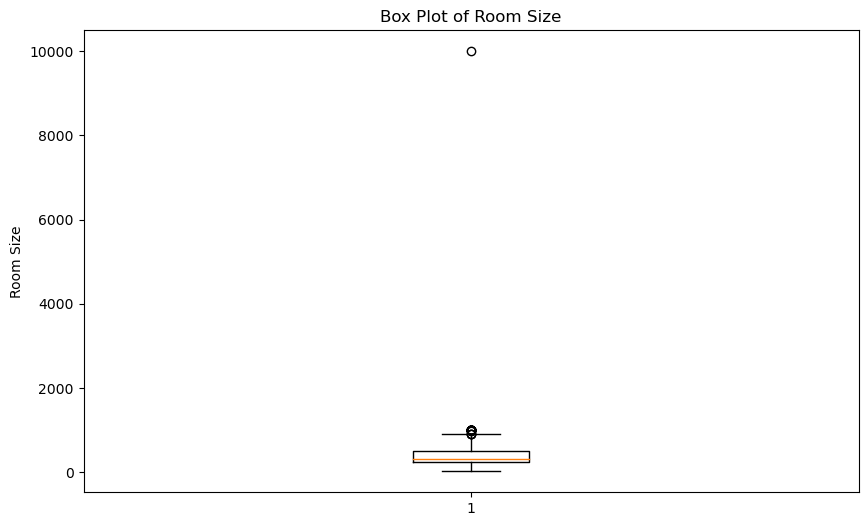

In [46]:
plt.figure(figsize=(10, 6))
plt.boxplot(df1['room_size'])
plt.title('Box Plot of Room Size')
plt.ylabel('Room Size')
plt.show()


In [47]:
df1[df1["room_size"]>2000]

,name,price_in_table,distance,room_size,sea_view,mountain_view,city_view,room_name,number_of_guests,private_bathroom,private_pool,rooftop_pool,minibar,barbecue,soundproofing,sauna,spa_bath,garden_view,number_of_bedrooms,url
501,NHÀ PHỐ CHO THUÊ NGUYÊN CĂN BÃI SAU 4 PHÒNG NGỦ 5Wc,2000000.0,1.7,10000.0,0.0,1.0,1.0,Villa,16,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4.0,https://www.booking.com/hotel/vn/truong-phat-guesthouse.en-gb.html?label=gen173nr-1BCAEoggI46AdIM1gEaPQBiAEBmAEJuAEXyAEM2AEB6AEBiAIBqAIDuALfh_mzBsACAdICJGVhYTdkNjZiLTQ5NjEtNDRlMy05YTkwLTRlZDA2NDgxYjQ2Y9gCBeACAQ&sid=20394c3452926236aad651478adb440c&aid=304142&ucfs=1&arphpl=1&checkin=2024-08-14&checkout=2024-08-15&dest_id=-3733750&dest_type=city&group_adults=5&req_adults=5&no_rooms=2&group_children=0&req_children=0&hpos=17&hapos=502&sr_order=popularity&nflt=ht_id%3D213&srpvid=9a3a36b405230c95&srepoch=1720165923&all_sr_blocks=187329915_391854777_16_0_0&highlighted_blocks=187329915_391854777_16_0_0&matching_block_id=187329915_391854777_16_0_0&sr_pri_blocks=187329915_391854777_16_0_0__200000000&from=searchresults


In [48]:
df1=df1[df1["room_size"]<2000]

D:\psql\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


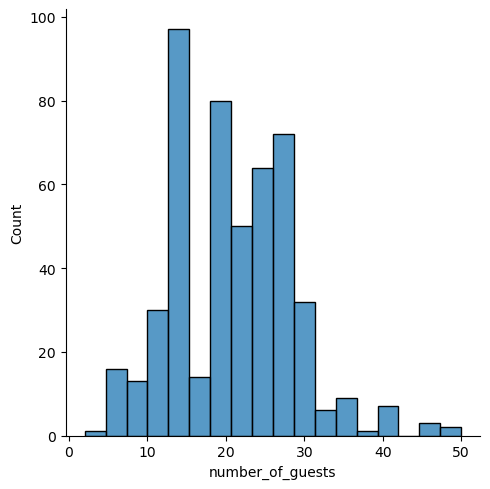

In [49]:
sns.displot(df1['number_of_guests'], kind="hist")

In [50]:
df1[(df1["number_of_guests"] < 5) | (df1["number_of_guests"] >= 40)]


,name,price_in_table,distance,room_size,sea_view,mountain_view,city_view,room_name,number_of_guests,private_bathroom,private_pool,rooftop_pool,minibar,barbecue,soundproofing,sauna,spa_bath,garden_view,number_of_bedrooms,url
29,Villages GOLD DAY Bãi Sau Á CHÂU,7609500.0,1.5,70.0,1.0,1.0,1.0,Villa,40,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0,https://www.booking.com/hotel/vn/villages-dang-khoa-10pn-bai-sau-vip.en-gb.html?label=gen173nr-1BCAEoggI46AdIM1gEaPQBiAEBmAEJuAEXyAEM2AEB6AEBiAIBqAIDuALfh_mzBsACAdICJGVhYTdkNjZiLTQ5NjEtNDRlMy05YTkwLTRlZDA2NDgxYjQ2Y9gCBeACAQ&sid=20394c3452926236aad651478adb440c&aid=304142&ucfs=1&arphpl=1&checkin=2024-08-14&checkout=2024-08-15&dest_id=-3733750&dest_type=city&group_adults=5&req_adults=5&no_rooms=2&group_children=0&req_children=0&hpos=5&hapos=30&sr_order=popularity&nflt=ht_id%3D213&srpvid=9a3a36b405230c95&srepoch=1720165625&all_sr_blocks=1147823301_387619098_40_0_0&highlighted_blocks=1147823301_387619098_40_0_0&matching_block_id=1147823301_387619098_40_0_0&sr_pri_blocks=1147823301_387619098_40_0_0__760950000&from_sustainable_property_sr=1&from=searchresults
107,Villages STYLE ĐẤU TRƯỜNG LA MÃ,8282340.0,1.3,89.0,1.0,1.0,1.0,Villa,45,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,11.0,https://www.booking.com/hotel/vn/villages-style-dau-truong-la-ma.en-gb.html?label=gen173nr-1BCAEoggI46AdIM1gEaPQBiAEBmAEJuAEXyAEM2AEB6AEBiAIBqAIDuALfh_mzBsACAdICJGVhYTdkNjZiLTQ5NjEtNDRlMy05YTkwLTRlZDA2NDgxYjQ2Y9gCBeACAQ&sid=20394c3452926236aad651478adb440c&aid=304142&ucfs=1&arphpl=1&checkin=2024-08-14&checkout=2024-08-15&dest_id=-3733750&dest_type=city&group_adults=5&req_adults=5&no_rooms=2&group_children=0&req_children=0&hpos=14&hapos=108&sr_order=popularity&nflt=ht_id%3D213&srpvid=9a3a36b405230c95&srepoch=1720165645&all_sr_blocks=1151091801_388835697_45_0_0&highlighted_blocks=1151091801_388835697_45_0_0&matching_block_id=1151091801_388835697_45_0_0&sr_pri_blocks=1151091801_388835697_45_0_0__828234000&from_sustainable_property_sr=1&from=searchresults
209,GOLD DAY SIÊU VIP Gần Biển RESORT Long Cung,9131400.0,5.3,99.0,1.0,1.0,1.0,Villa,40,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,11.0,https://www.booking.com/hotel/vn/villages-sieu-vip-gan-bien-resort-long-cung.en-gb.html?label=gen173nr-1BCAEoggI46AdIM1gEaPQBiAEBmAEJuAEXyAEM2AEB6AEBiAIBqAIDuALfh_mzBsACAdICJGVhYTdkNjZiLTQ5NjEtNDRlMy05YTkwLTRlZDA2NDgxYjQ2Y9gCBeACAQ&sid=20394c3452926236aad651478adb440c&aid=304142&ucfs=1&arphpl=1&checkin=2024-08-14&checkout=2024-08-15&dest_id=-3733750&dest_type=city&group_adults=5&req_adults=5&no_rooms=2&group_children=0&req_children=0&hpos=1&hapos=210&sr_order=popularity&nflt=ht_id%3D213&srpvid=9a3a36b405230c95&srepoch=1720165724&all_sr_blocks=1152673501_388057946_40_0_0&highlighted_blocks=1152673501_388057946_40_0_0&matching_block_id=1152673501_388057946_40_0_0&sr_pri_blocks=1152673501_388057946_40_0_0__913140000&from_sustainable_property_sr=1&from=searchresults
218,Diễm My Villa 12/10,5950000.0,3.2,700.0,0.0,0.0,0.0,Villa,40,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,https://www.booking.com/hotel/vn/diem-my-villa-12-10.en-gb.html?label=gen173nr-1BCAEoggI46AdIM1gEaPQBiAEBmAEJuAEXyAEM2AEB6AEBiAIBqAIDuALfh_mzBsACAdICJGVhYTdkNjZiLTQ5NjEtNDRlMy05YTkwLTRlZDA2NDgxYjQ2Y9gCBeACAQ&sid=20394c3452926236aad651478adb440c&aid=304142&ucfs=1&arphpl=1&checkin=2024-08-14&checkout=2024-08-15&dest_id=-3733750&dest_type=city&group_adults=5&req_adults=5&no_rooms=2&group_children=0&req_children=0&hpos=10&hapos=219&sr_order=popularity&nflt=ht_id%3D213&srpvid=9a3a36b405230c95&srepoch=1720165724&all_sr_blocks=1086065901_387896267_40_2_0&highlighted_blocks=1086065901_387896267_40_2_0&matching_block_id=1086065901_387896267_40_2_0&sr_pri_blocks=1086065901_387896267_40_2_0__595000000&from=searchresults
241,Villa Hồ Bơi PHƯƠNG NAM Long Cung Resort,5273100.0,5.3,399.0,1.0,1.0,1.0,Villa,40,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0,https://www.booking.com/hotel/vn/villa-ho-boi-phuong-nam-long-cung-resort.en-gb.html?label=gen173nr-1BCAEoggI46AdIM1gEaPQBiAEBmAEJuAEXyAEM2AEB6AEBiAIBqAIDuALfh_mzB

In [51]:
df1=df1[df1["number_of_guests"]>=5]
df1=df1[df1["number_of_bedrooms"]>1]

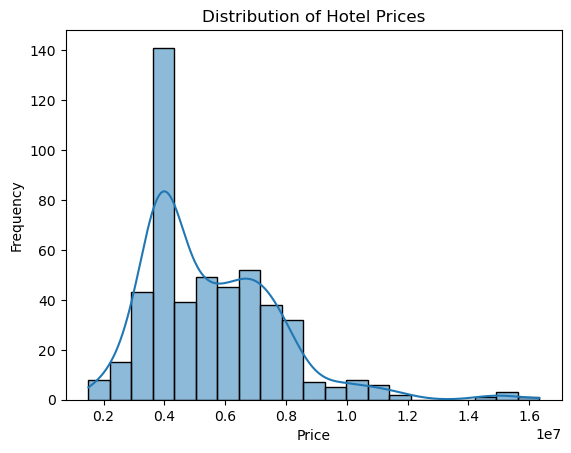

In [52]:
ax = sns.histplot(data=df1, x='price_in_table', kde=True)

# Thiết lập tiêu đề và nhãn cho biểu đồ
plt.title('Distribution of Hotel Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')


plt.show()

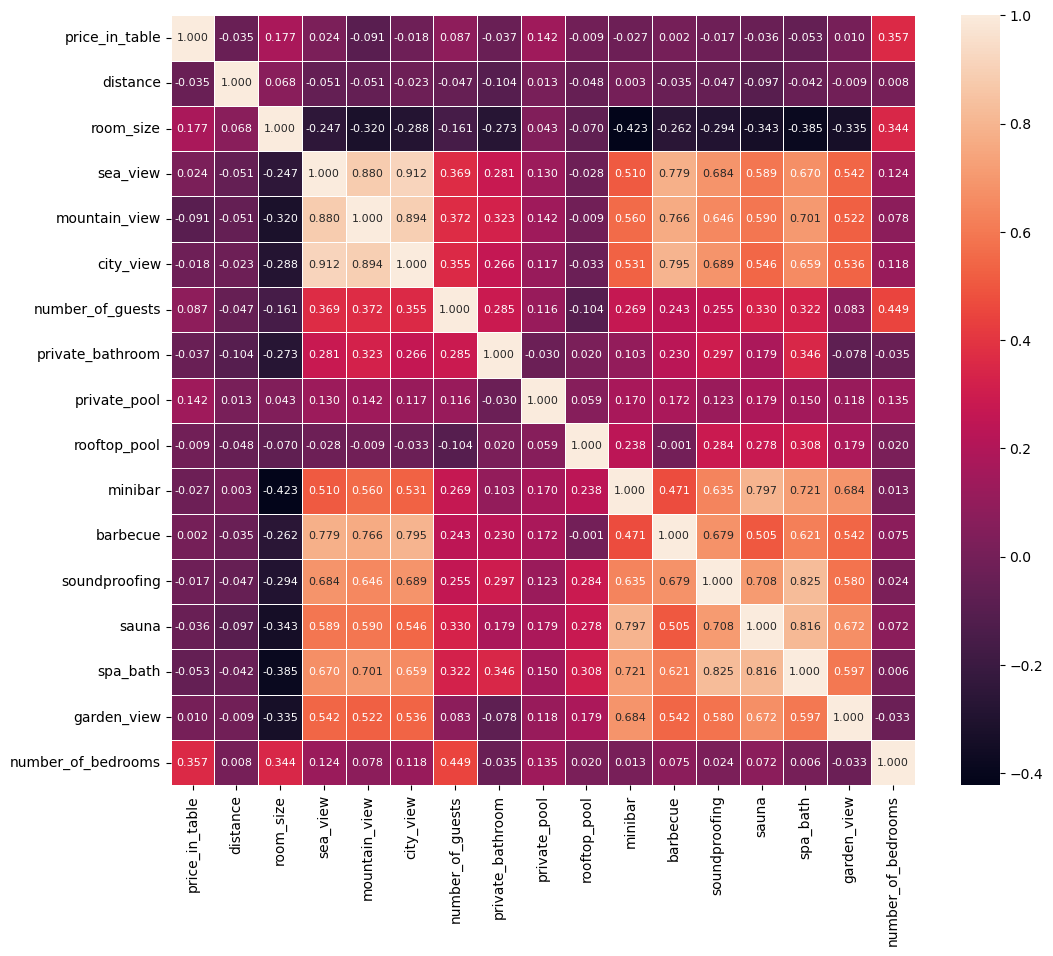

In [54]:
numerical_df = df1.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, fmt=".3f", linewidths=.7, annot_kws={"size": 8})
plt.show()

In [55]:
X=df1.drop(["name","price_in_table","url","room_name"],axis=1)
Y=df1.price_in_table.values

X_train_scaled, X_test_scaled, y_train, y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
def evaluate_model(model):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    return mae

# Linear Regression
lr = LinearRegression()
mae_lr = evaluate_model(lr)
print(f"Linear Regression -  MAE: {mae_lr}")

# Lasso Regression
lasso = Lasso()
param_grid_lasso = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search_lasso = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train_scaled, y_train)
best_lasso = grid_search_lasso.best_estimator_
mae_lasso = evaluate_model(best_lasso)
print(f"Lasso Regression -  MAE: {mae_lasso}")

# Random Forest Regressor
rf = RandomForestRegressor()
param_grid_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train_scaled, y_train)
best_rf = grid_search_rf.best_estimator_
mae_rf = evaluate_model(best_rf)
print(f"Random Forest - MAE: {mae_rf}")

Linear Regression -  MAE: 1743578.7943769293
Lasso Regression -  MAE: 1743169.113711729
Random Forest - MAE: 1456488.5296178472


In [61]:
import pickle
filename="train_model.sav"
pickle.dump(best_rf,open(filename,"wb"))